### Work Flow:

### Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset:

In [2]:
medi_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
medi_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
medi_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
medi_df.shape

(1338, 7)

In [5]:
medi_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
medi_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
medi_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

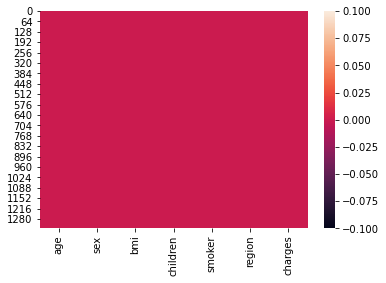

In [8]:
sns.heatmap(medi_df.isnull());

In [9]:
medi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Observation: Categorial Features:
1. Sex
2. Smoker
3. Region

### Data Analysis:

In [10]:
medi_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observation: Here, we can see-
1. average age = 39, bmi = 30, children = 1 and charges = 13270 USD.
2. Quartile: a> data below 25% age = 27, bmi = 26, children = 0 and charges = 4740 USD.
             b> data below 50% age = 39, bmi = 30, children = 1 and charges = 9382 USD.
3. std: This shows distribution of data. age = 14, bmi = 6, children = 1 and charges = 12110 USD.

#### Showing distribution of different columns into graph: 

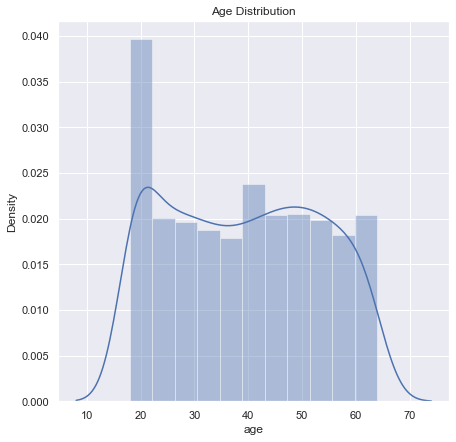

In [11]:
# Distribution of age value:
sns.set()
plt.figure(figsize = (7, 7))
sns.distplot(medi_df['age'])
plt.title('Age Distribution')
plt.show()

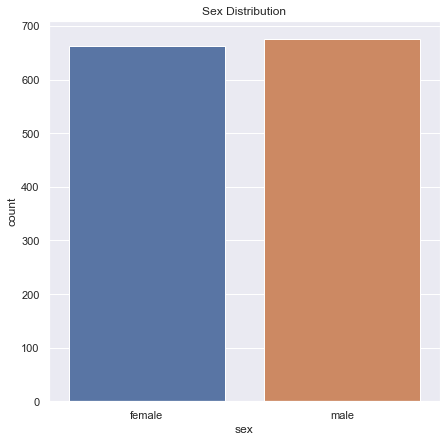

In [12]:
# Distribution of gender Column:
plt.figure(figsize= (7, 7))
sns.countplot(x = 'sex', data = medi_df)
plt.title('Sex Distribution')
plt.show()

In [13]:
medi_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

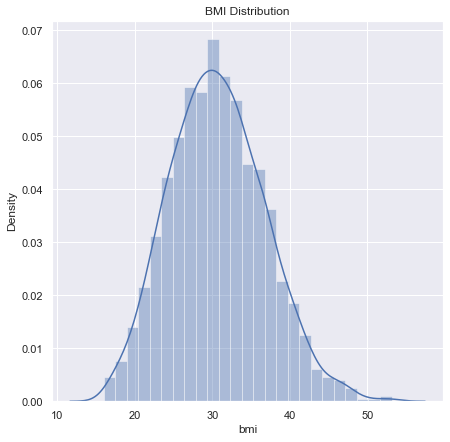

In [14]:
# Distribution of BMI column:
sns.set()
plt.figure(figsize = (7, 7))
sns.distplot(medi_df['bmi'])
plt.title('BMI Distribution')
plt.show()

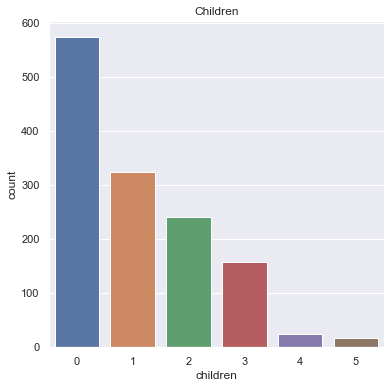

In [15]:
# Distribution of children column:
plt.figure(figsize=(6,6))
sns.countplot(x = 'children', data = medi_df)
plt.title('Children')
plt.show()

In [16]:
medi_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

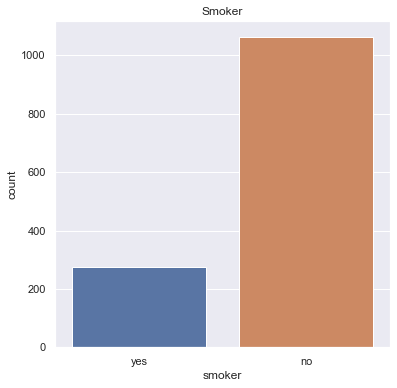

In [17]:
# Distribution of Smoker column:
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker', data = medi_df)
plt.title('Smoker')
plt.show()

In [18]:
medi_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

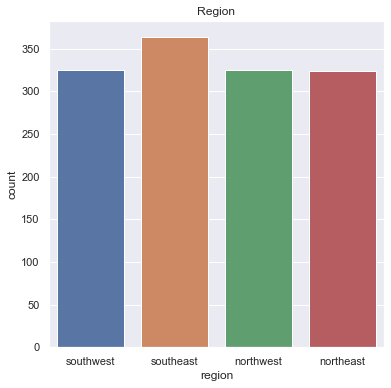

In [19]:
# Distribution of Region column:
plt.figure(figsize=(6,6))
sns.countplot(x = 'region', data = medi_df)
plt.title('Region')
plt.show()

In [20]:
medi_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

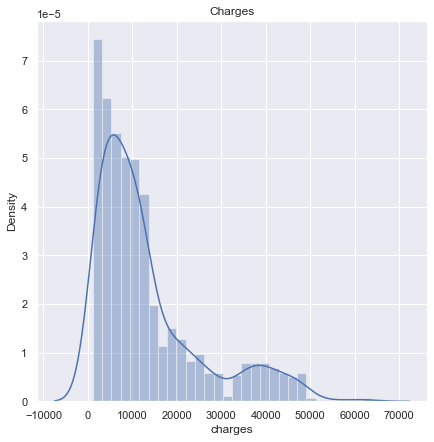

In [21]:
# Distribution of Charges column:
sns.set()
plt.figure(figsize = (7, 7))
sns.distplot(medi_df['charges'])
plt.title('Charges')
plt.show()

#### Showing the relation between columns with pairplot:

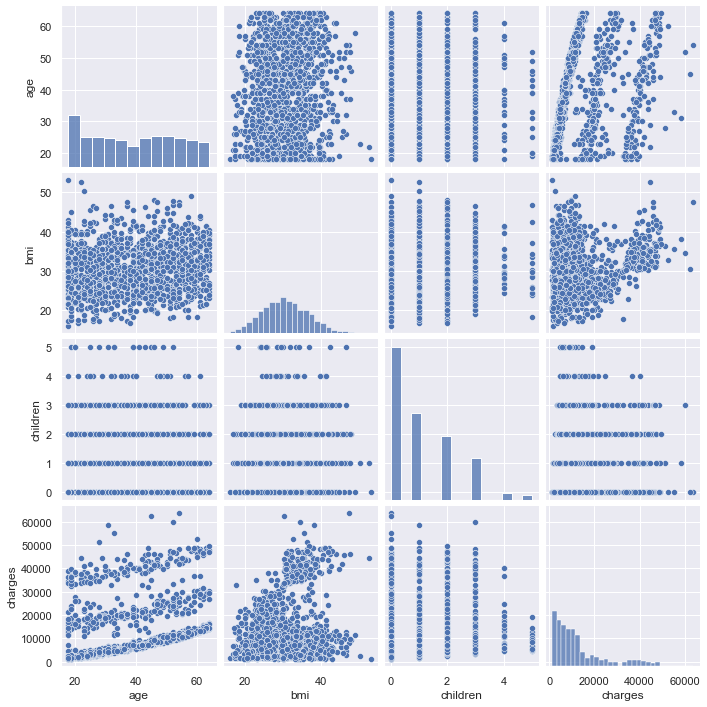

In [22]:
sns.pairplot(medi_df)
plt.show()

### Data Preprocessing:

#### Encoding the categorical features:

In [23]:
# Encoding 'Sex' column:
medi_df.replace({'sex':{'male':0, 'female':1}}, inplace = True)

# Encoding 'Smoker' column:
medi_df.replace({'smoker':{'yes':0, 'no':1}}, inplace = True)

# Encoding 'Region' column:
medi_df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace = True)


In [24]:
medi_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [25]:
medi_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,1,3,10600.5483
1334,18,1,31.92,0,1,2,2205.9808
1335,18,1,36.85,0,1,0,1629.8335
1336,21,1,25.80,0,1,1,2007.9450
1337,61,1,29.07,0,0,3,29141.3603


#### Split the dataset into Features and Target:

In [26]:
x = medi_df.drop(columns = 'charges', axis = 1)
y = medi_df['charges']

In [27]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [28]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Spliting the data into Training Data and Testing Data:

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Training with Linear Regression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(x_train, y_train)

LinearRegression()

### Model Evaluation

In [32]:
# Prediction on training data:
training_data_prediction = lr.predict(x_train)

In [33]:
# R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared value: ', r2_train)

R squared value:  0.751505643411174


In [34]:
# Prediction on test data:
test_data_prediction = lr.predict(x_test)

In [35]:
# R squared value:
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7447273869684077


### Building a Predictive System

In [36]:
# Taking a new input for prediction of it's medical cost:
input_data = (31,1,25.74,0,1,0)    # 31,female=1,25.74,0,no=0,southeast=1, except it's charges(3756.6216)
# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)
prediction = lr.predict(input_data_reshape)
print('The Insurance Cost in USD : ',prediction)

The Insurance Cost in USD :  [3760.0805765]
